# Car Price Prediction

Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
     - Which variables are significant in finding the price of a car.
     - How well those variables describe the price of a car 
     - Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

# (1) Reading and understanding the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
car=pd.read_csv('D:\\DSWF\\carprice_assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.shape

(205, 26)

In [5]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
car.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
car.isnull().sum(axis=0)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

from above there is no null data or missing data, so there is no need to apply "data cleaning".

# (2) visualising the data and data preparation

in visualising the data,first of all we have to see,in which our data consists of numerical values and categorical values.

#### Visualising Numeric Variables

for the visualising of numerical data we have to use pairplot.

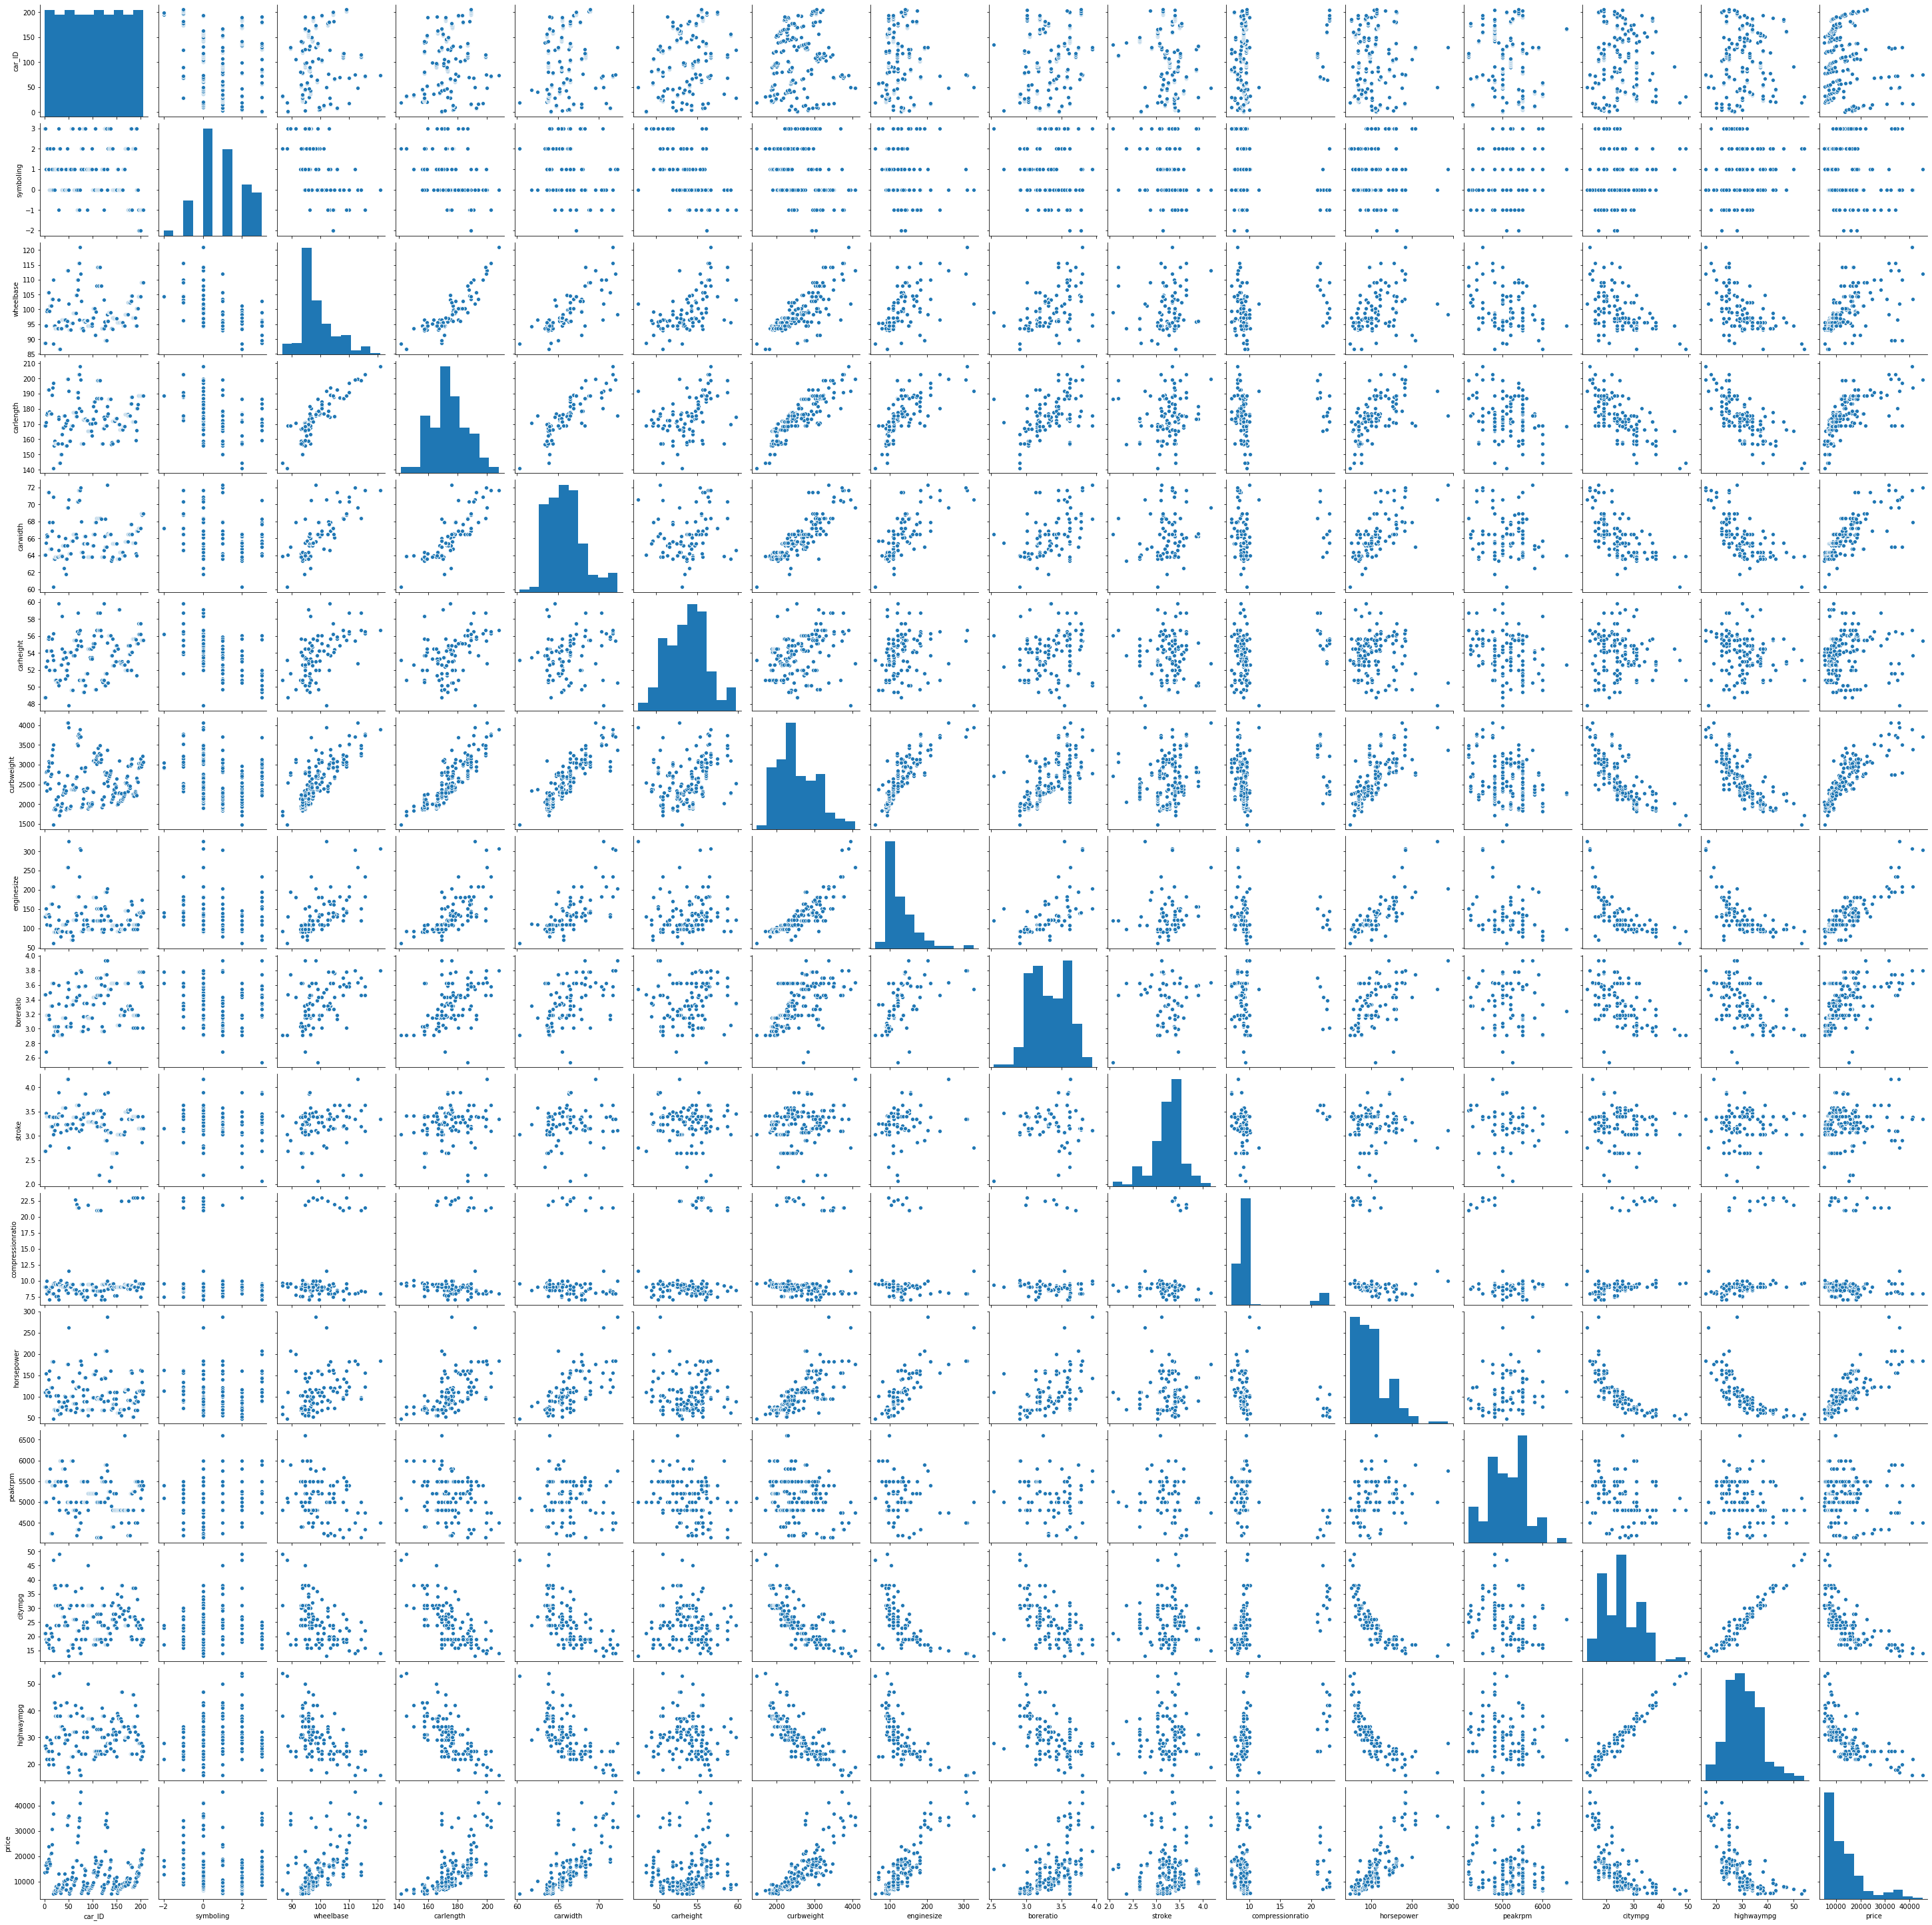

In [10]:
sns.pairplot(car)
plt.show()

### Visualising Categorical Variables

If we observe our data,it also have categorical data columns,they are as
 1 CarName           
 3   fueltype           
 4   aspiration        
 5   doornumber         
 6   carbody            
 7   drivewheel        
 8   enginelocation 
 14  enginetype        
 15  cylindernumber
 17  fuelsystem 
 
 Let's make a boxplot for some of these variables.

To see relation between x and y axis,we must want independent variable at x axis.
but from our case study 
>>There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.
note:
>>>wee need to consider only "company name" as the "independent variable" for model building. 

In [11]:
print(car['CarName'])

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object


so we need to separate the "car company" name with "car model" name.

In [12]:
CompanyName = car['CarName'].apply(lambda x : x.split(' ')[0])
car.insert(3,"CompanyName",CompanyName)
car.drop(['CarName'],axis=1,inplace=True)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


now let see how many company names are there in dataset

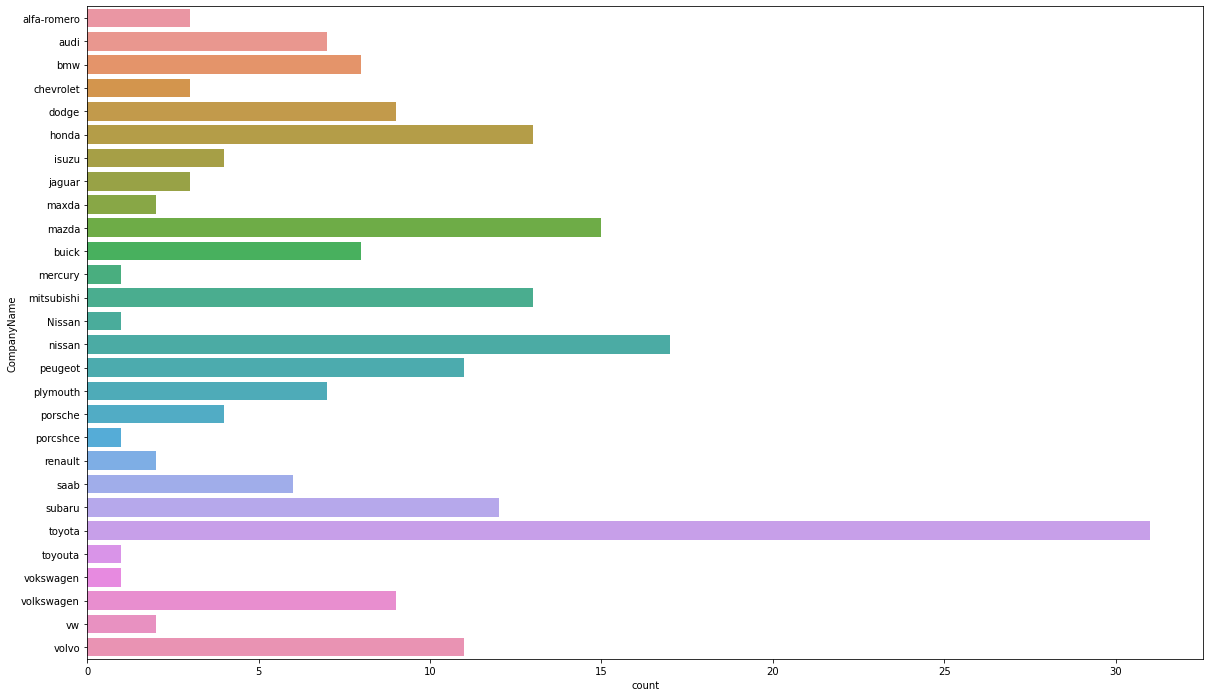

In [13]:
plt.figure(figsize=(20,12))
sns.countplot(y="CompanyName", data=car)
plt.show()

from above plot,we observe that "toyota" company has more demand when compared to other companies.

let see the realtion between some of the categorical variables with respect to the price.

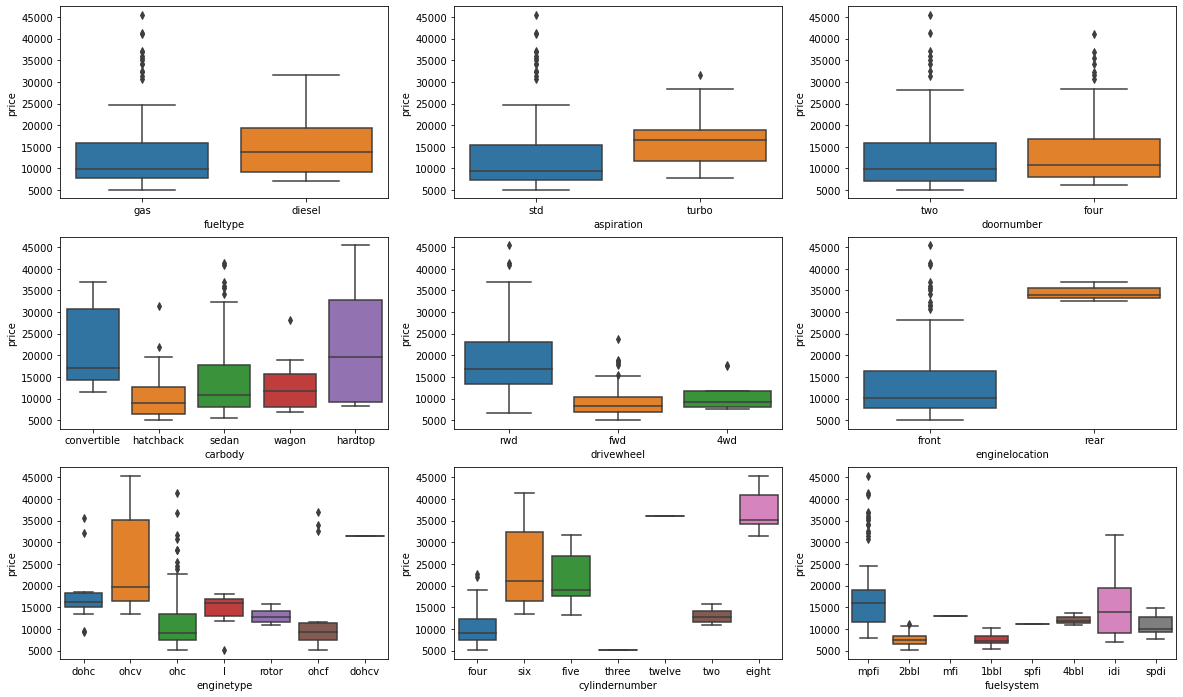

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x ='fueltype',y ='price',data = car)
plt.subplot(3,3,2)
sns.boxplot(x ='aspiration',y ='price',data = car)
plt.subplot(3,3,3)
sns.boxplot(x ='doornumber',y ='price',data = car)
plt.subplot(3,3,4)
sns.boxplot(x ='carbody',y ='price',data = car)
plt.subplot(3,3,5)
sns.boxplot(x ='drivewheel',y ='price',data = car)
plt.subplot(3,3,6)
sns.boxplot(x ='enginelocation',y ='price',data = car)
plt.subplot(3,3,7)
sns.boxplot(x ='enginetype',y ='price',data = car)
plt.subplot(3,3,8)
sns.boxplot(x ='cylindernumber',y ='price',data = car)
plt.subplot(3,3,9)
sns.boxplot(x ='fuelsystem',y ='price',data = car)
plt.show()



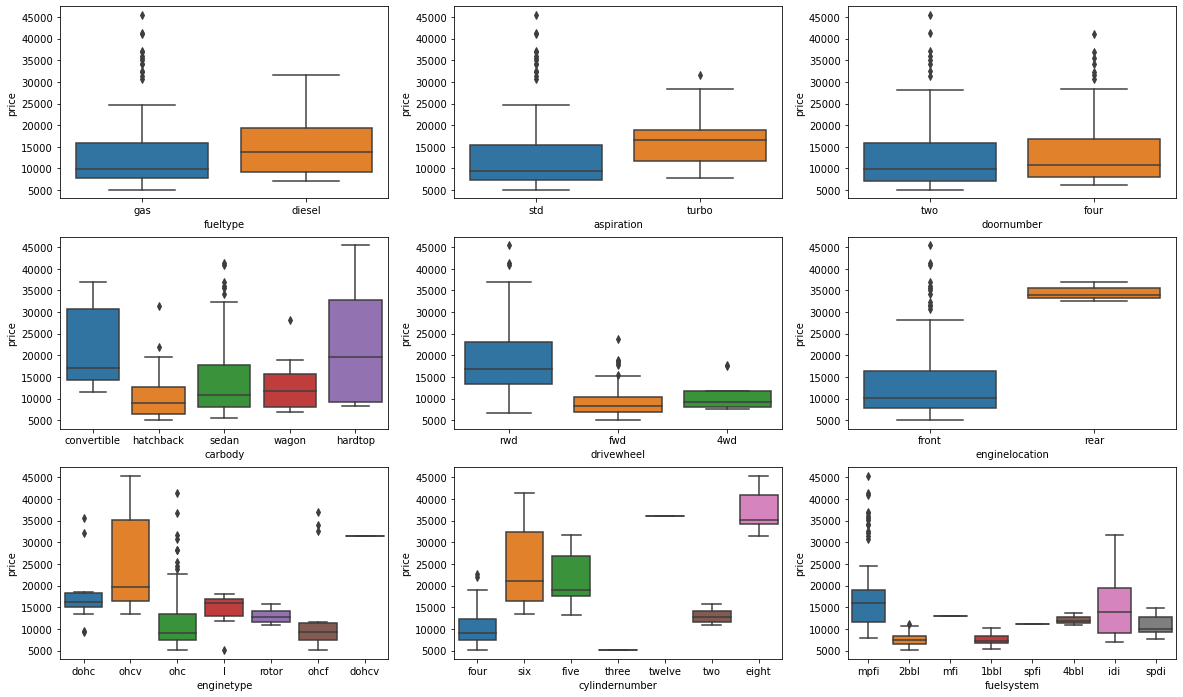

In [15]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x ='fueltype',y ='price',data = car)
plt.subplot(3,3,2)
sns.boxplot(x ='aspiration',y ='price',data = car)
plt.subplot(3,3,3)
sns.boxplot(x ='doornumber',y ='price',data = car)
plt.subplot(3,3,4)
sns.boxplot(x ='carbody',y ='price',data = car)
plt.subplot(3,3,5)
sns.boxplot(x ='drivewheel',y ='price',data = car)
plt.subplot(3,3,6)
sns.boxplot(x ='enginelocation',y ='price',data = car)
plt.subplot(3,3,7)
sns.boxplot(x ='enginetype',y ='price',data = car)
plt.subplot(3,3,8)
sns.boxplot(x ='cylindernumber',y ='price',data = car)
plt.subplot(3,3,9)
sns.boxplot(x ='fuelsystem',y ='price',data = car)
plt.show()

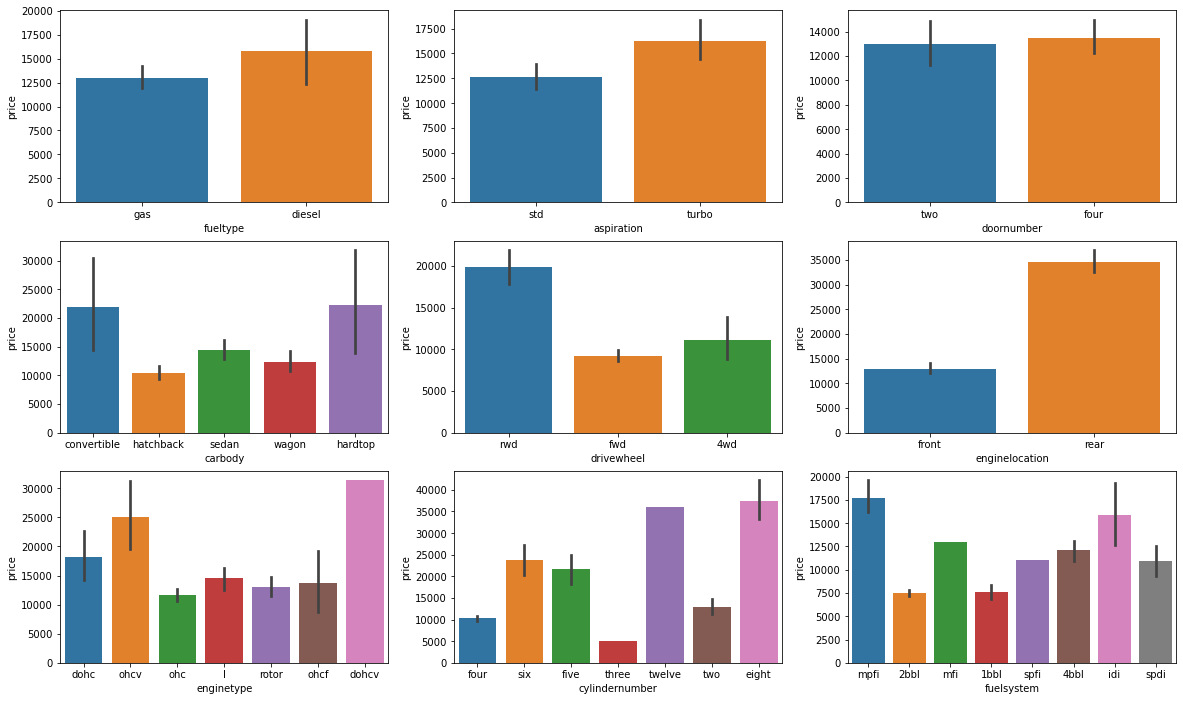

In [16]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.barplot(x ='fueltype',y ='price',data = car)
plt.subplot(3,3,2)
sns.barplot(x ='aspiration',y ='price',data = car)
plt.subplot(3,3,3)
sns.barplot(x ='doornumber',y ='price',data = car)
plt.subplot(3,3,4)
sns.barplot(x ='carbody',y ='price',data = car)
plt.subplot(3,3,5)
sns.barplot(x ='drivewheel',y ='price',data = car)
plt.subplot(3,3,6)
sns.barplot(x ='enginelocation',y ='price',data = car)
plt.subplot(3,3,7)
sns.barplot(x ='enginetype',y ='price',data = car)
plt.subplot(3,3,8)
sns.barplot(x ='cylindernumber',y ='price',data = car)
plt.subplot(3,3,9)
sns.barplot(x ='fuelsystem',y ='price',data = car)
plt.show()

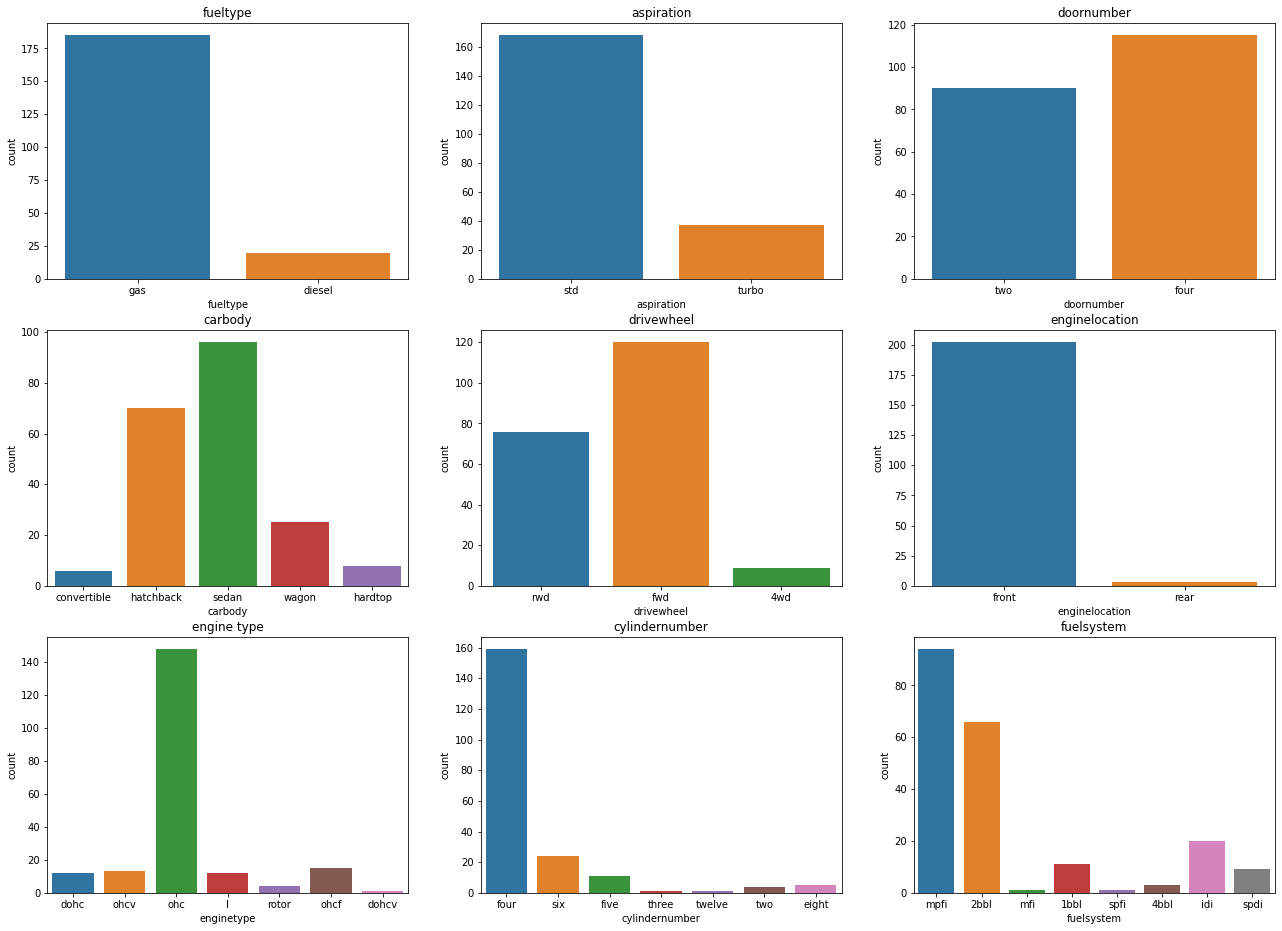

In [17]:
plt.figure(figsize=(22,16))
plt.subplot(3,3,1)
sns.countplot(x ='fueltype',data = car)
plt.title('fueltype')
plt.subplot(3,3,2)
sns.countplot(x ='aspiration',data = car)
plt.title('aspiration')
plt.subplot(3,3,3)
sns.countplot(x ='doornumber',data = car)
plt.title('doornumber')
plt.subplot(3,3,4)
sns.countplot(x ='carbody',data = car)
plt.title('carbody')
plt.subplot(3,3,5)
sns.countplot(x ='drivewheel',data = car)
plt.title('drivewheel')
plt.subplot(3,3,6)
sns.countplot(x ='enginelocation',data = car)
plt.title('enginelocation')
plt.subplot(3,3,7)
sns.countplot(x ='enginetype',data = car)
plt.title('engine type')
plt.subplot(3,3,8)
sns.countplot(x ='cylindernumber',data = car)
plt.title('cylindernumber')
plt.subplot(3,3,9)
sns.countplot(x ='fuelsystem',data = car)
plt.title('fuelsystem')
plt.show()

from above analysis:
actually usage of parameters is more ,they doesnot mine with price.

symboling  =  Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 

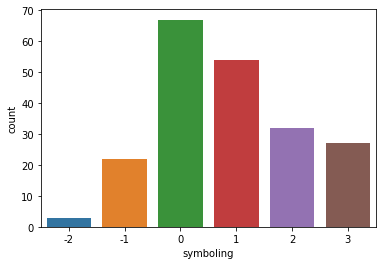

In [18]:
sns.countplot(x='symboling',data=car)
plt.show()

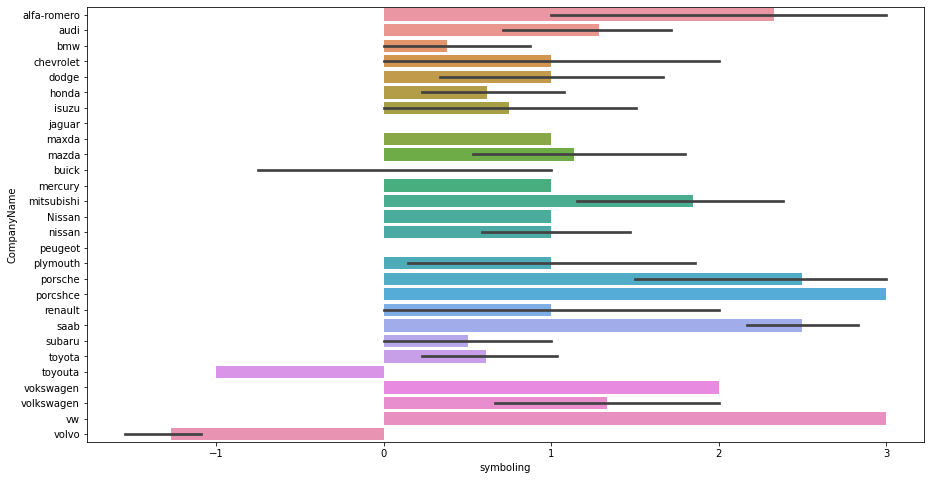

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x='symboling',y='CompanyName',data=car)
plt.show()

from above analyis,the insurance risk rate for all the companies is safe except vw,porsche.

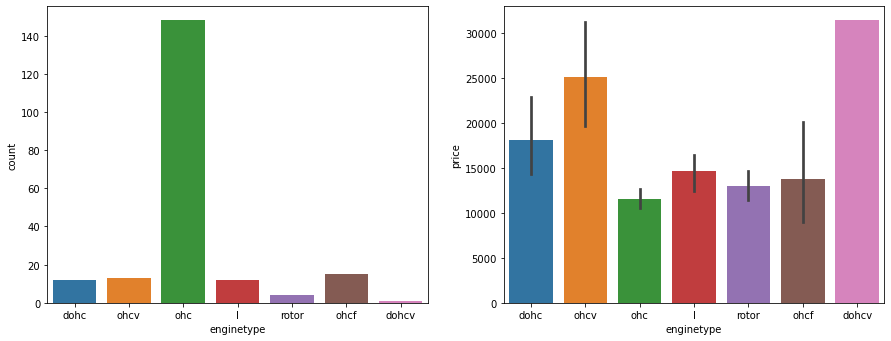

In [20]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.countplot(x='enginetype',data=car)
plt.subplot(222)
sns.barplot(x ='enginetype',y ='price',data = car)
plt.show()

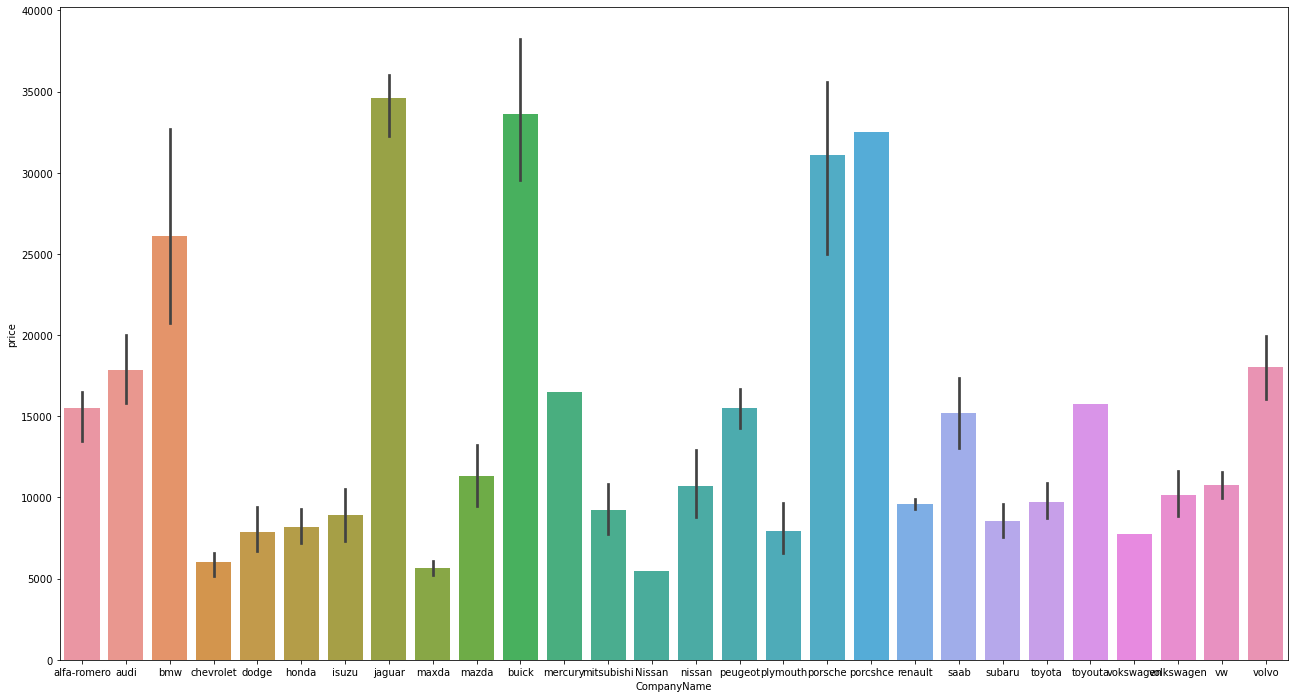

In [21]:
plt.figure(figsize=(22,12))
sns.barplot(x='CompanyName',y='price',data=car)
plt.show()

from above analysis the costliest companies is jaguar,porshce,buick.

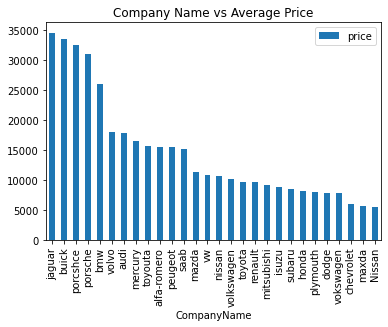

In [22]:
df = pd.DataFrame(car.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

from above analysis,we have to delete the negatively correlated columns.they are as

Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.

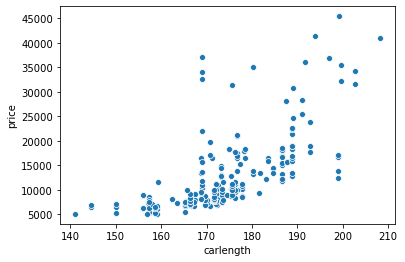

In [23]:
sns.scatterplot(car['carlength'],car['price'])
plt.show()

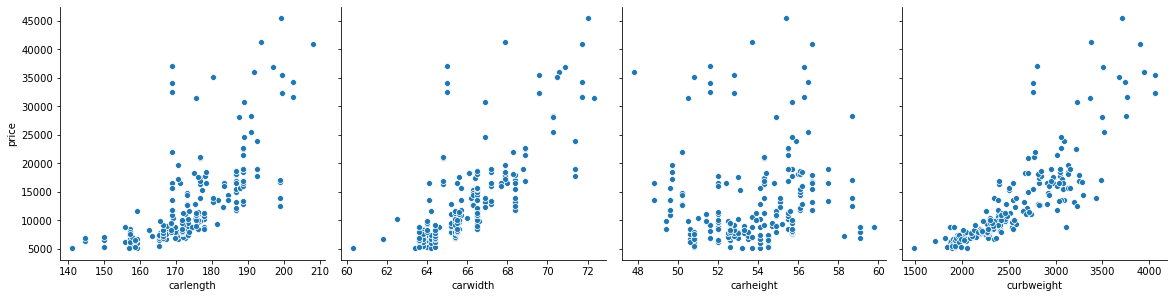

In [24]:
sns.pairplot(car, x_vars=['carlength', 'carwidth', 'carheight','curbweight'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

carwidth, carlength and curbweight seems to have a poitive correlation with price.
carheight doesn't show any significant trend with price.

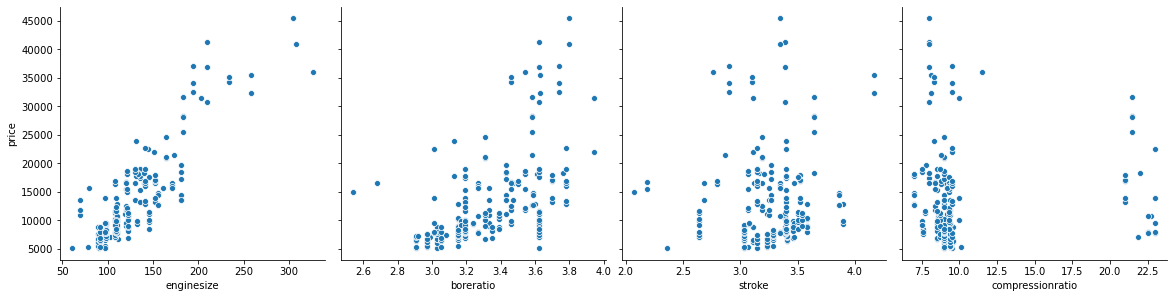

In [25]:
sns.pairplot(car, x_vars=['enginesize', 'boreratio', 'stroke','compressionratio'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

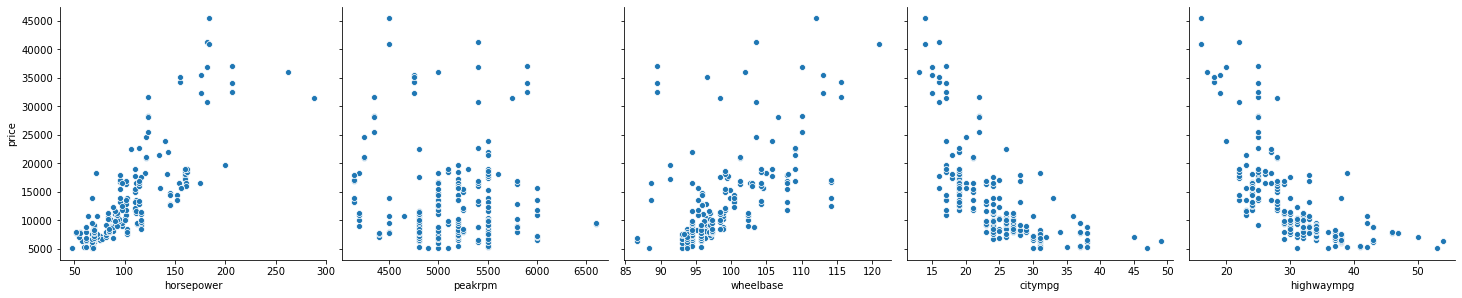

In [26]:
sns.pairplot(car, x_vars=['horsepower', 'peakrpm','wheelbase', 'citympg', 'highwaympg'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

from  above relations some are significant related and some are insignificant related.
1)enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
2)citympg, highwaympg - seem to have a significant negative correlation with price.

List of significant variables after Visual analysis : 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 

In [27]:
car_a=car[['fueltype','CompanyName','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']]
car_a.head()

,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,audi,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,audi,std,four,sedan,4wd,front,ohc,five,mpfi


In [28]:
car_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fueltype        205 non-null    object
 1   CompanyName     205 non-null    object
 2   aspiration      205 non-null    object
 3   doornumber      205 non-null    object
 4   carbody         205 non-null    object
 5   drivewheel      205 non-null    object
 6   enginelocation  205 non-null    object
 7   enginetype      205 non-null    object
 8   cylindernumber  205 non-null    object
 9   fuelsystem      205 non-null    object
dtypes: object(10)
memory usage: 16.1+ KB


In [29]:
car_lr = car[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                     'carlength','carwidth']]
print(car_lr.head())
print(car_lr.columns)

     price fueltype aspiration      carbody drivewheel  wheelbase  curbweight  \
0  13495.0      gas        std  convertible        rwd       88.6        2548   
1  16500.0      gas        std  convertible        rwd       88.6        2548   
2  16500.0      gas        std    hatchback        rwd       94.5        2823   
3  13950.0      gas        std        sedan        fwd       99.8        2337   
4  17450.0      gas        std        sedan        4wd       99.4        2824   

  enginetype cylindernumber  enginesize  boreratio  horsepower  carlength  \
0       dohc           four         130       3.47         111      168.8   
1       dohc           four         130       3.47         111      168.8   
2       ohcv            six         152       2.68         154      171.2   
3        ohc           four         109       3.19         102      176.6   
4        ohc           five         136       3.19         115      176.6   

   carwidth  
0      64.1  
1      64.1  
2      6

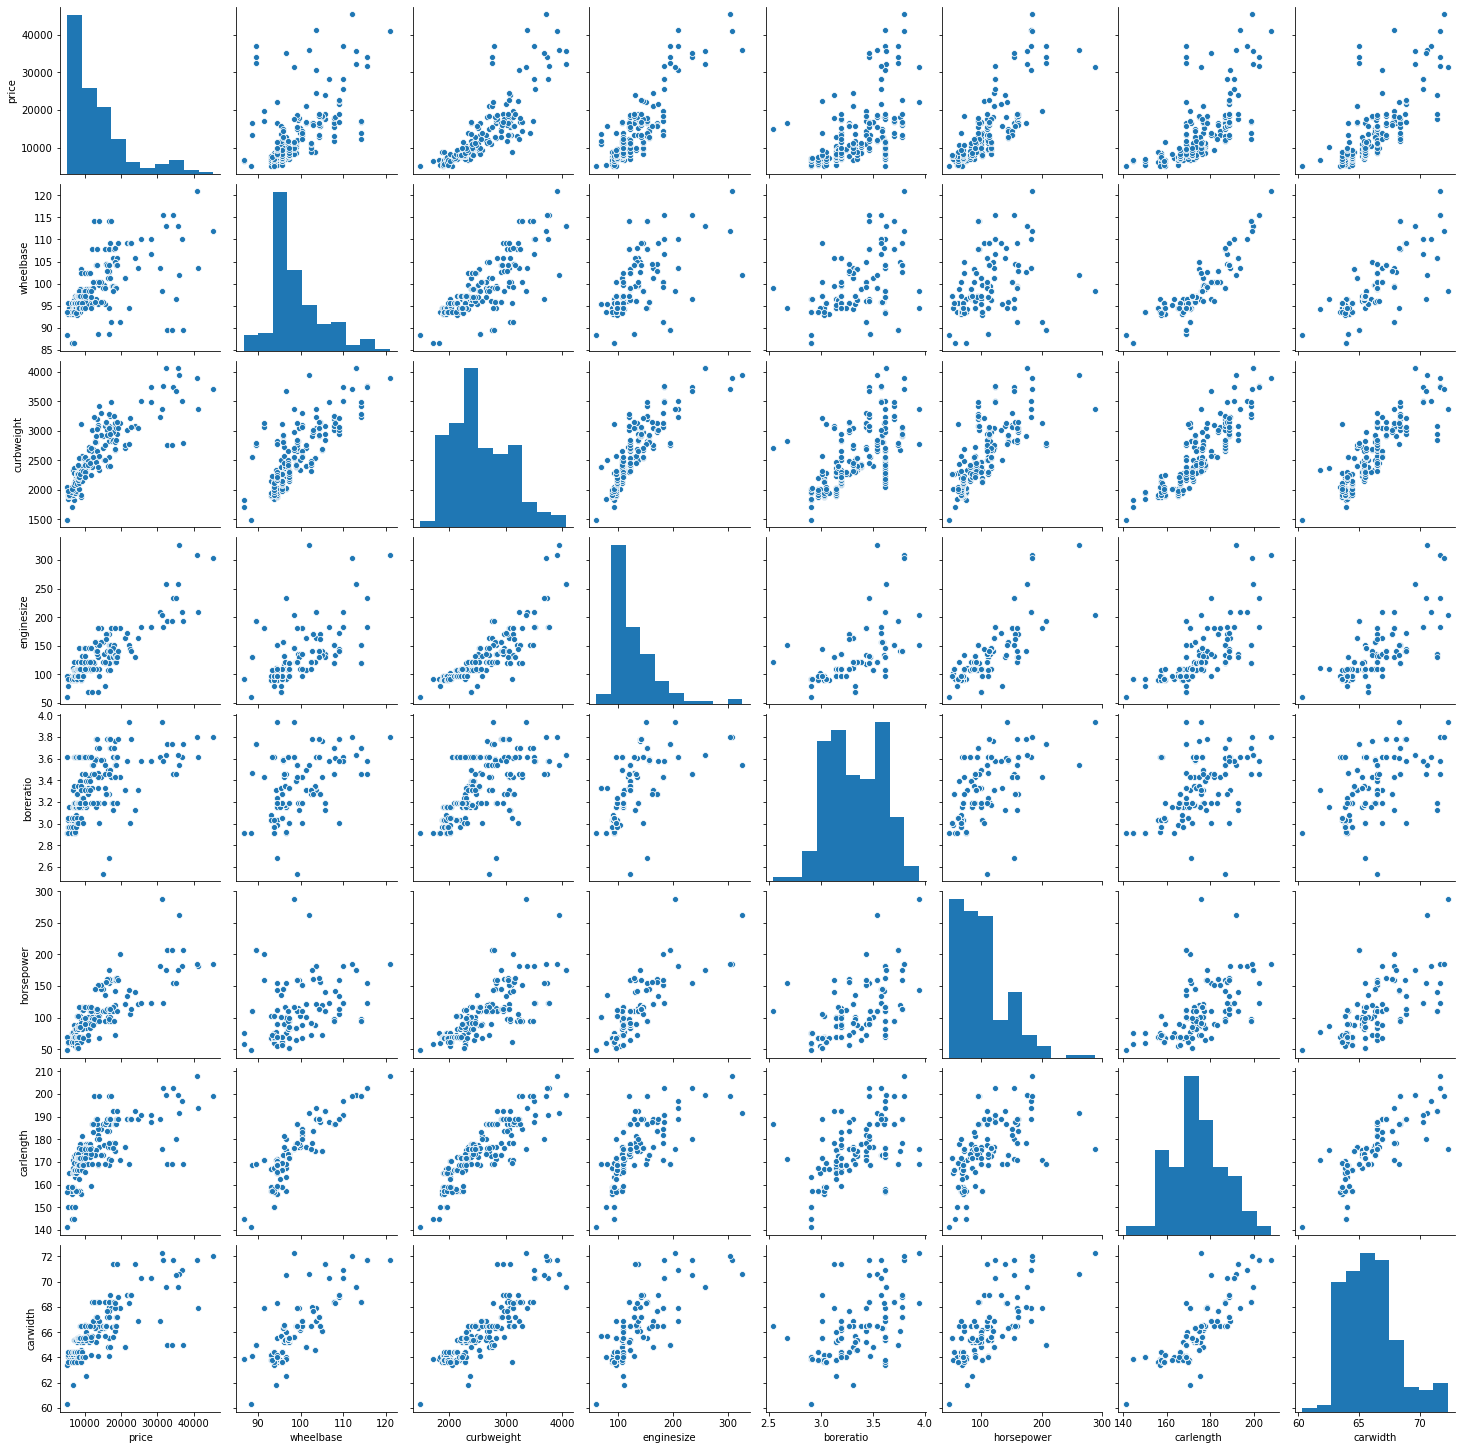

In [30]:
sns.pairplot(car_lr)
plt.show()

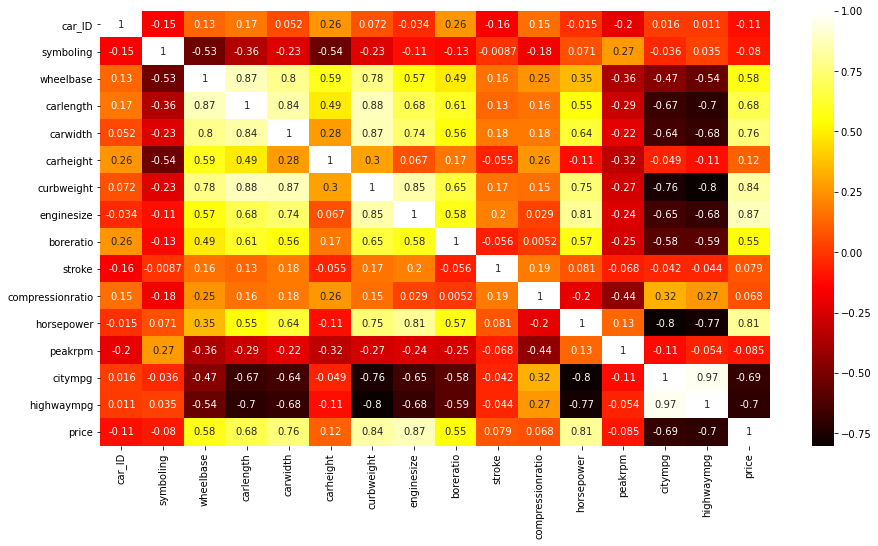

In [31]:
plt.figure(figsize = (15, 8))
sns.heatmap(car.corr(), annot = True, cmap="hot")
plt.show()

# (3) Splitting the Data into Training and Testing Sets¶

In [32]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
122,0.068818,gas,std,sedan,fwd,0.244828,0.272692,ohc,four,0.139623,0.230159,0.083333,0.426016,0.291667
125,0.466890,gas,std,hatchback,rwd,0.272414,0.500388,ohc,four,0.339623,1.000000,0.395833,0.452033,0.666667
166,0.122110,gas,std,hatchback,rwd,0.272414,0.314973,dohc,four,0.139623,0.444444,0.266667,0.448780,0.308333
1,0.314446,gas,std,convertible,rwd,0.068966,0.411171,dohc,four,0.260377,0.626984,0.262500,0.450407,0.316667
199,0.382131,gas,turbo,wagon,rwd,0.610345,0.647401,ohc,four,0.260377,0.746032,0.475000,0.775610,0.575000


In [35]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


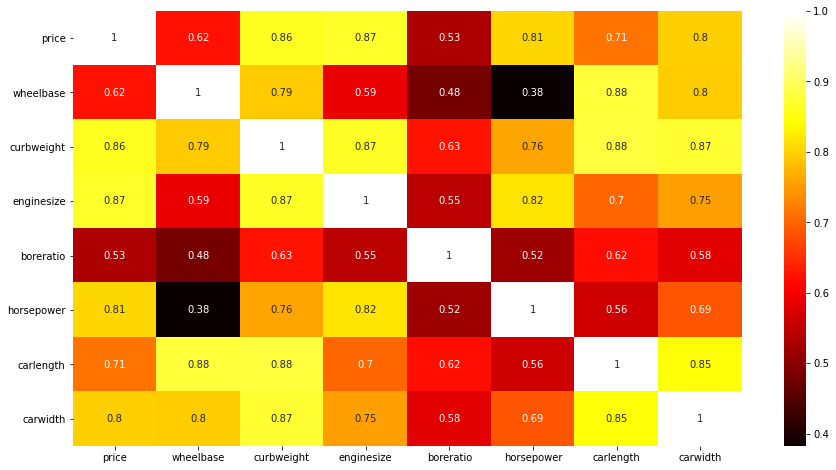

In [36]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_train.corr(), annot = True, cmap="hot")
plt.show()

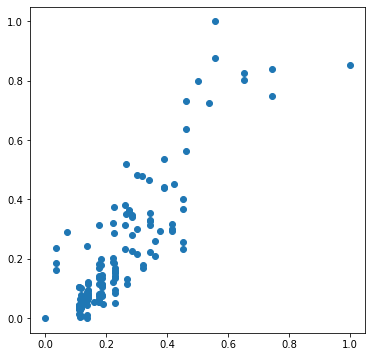

In [37]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

In [38]:
y_train = df_train.pop('price')
X_train = df_train

In [39]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(X_train[['enginesize']])
lr = sm.OLS(y_train, x_train_lm).fit()

In [40]:
lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

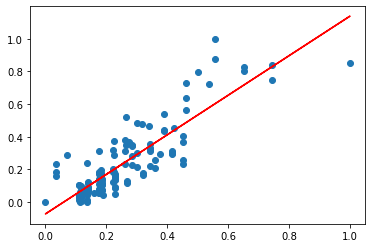

In [41]:
plt.scatter(x_train_lm.iloc[:, 1], y_train)
plt.plot(x_train_lm.iloc[:, 1], -0.072 + 1.21*x_train_lm.iloc[:, 1], 'r')
plt.show()

In [42]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.09e-44
Time:                        16:14:57   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

In [43]:
x_train_lm = X_train[['enginesize', 'curbweight']]

In [44]:
x_train_lm = sm.add_constant(x_train_lm)

lr = sm.OLS(y_train, x_train_lm).fit()

lr.params

const        -0.128113
enginesize    0.678162
curbweight    0.450496
dtype: float64

In [45]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           5.31e-50
Time:                        16:14:57   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

In [46]:
x_train_lm = X_train[['enginesize', 'curbweight','wheelbase']]

In [47]:
x_train_lm = sm.add_constant(x_train_lm)

lr = sm.OLS(y_train, x_train_lm).fit()

lr.params

const        -0.124411
enginesize    0.656489
curbweight    0.496748
wheelbase    -0.042165
dtype: float64

In [48]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     188.6
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           8.39e-49
Time:                        16:14:58   Log-Likelihood:                 133.03
No. Observations:                 143   AIC:                            -258.1
Df Residuals:                     139   BIC:                            -246.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1244      0.019     -6.644      0.0

In [49]:
x_train_lm = X_train[['enginesize', 'curbweight','wheelbase','horsepower']]


In [50]:
x_train_lm = sm.add_constant(x_train_lm)

lr = sm.OLS(y_train, x_train_lm).fit()

lr.params

const        -0.134848
enginesize    0.483261
curbweight    0.291307
wheelbase     0.092577
horsepower    0.354779
dtype: float64

In [51]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     158.3
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.59e-50
Time:                        16:14:58   Log-Likelihood:                 139.97
No. Observations:                 143   AIC:                            -269.9
Df Residuals:                     138   BIC:                            -255.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1348      0.018     -7.442      0.0

In [52]:
X_train.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
122,gas,std,sedan,fwd,0.244828,0.272692,ohc,four,0.139623,0.230159,0.083333,0.426016,0.291667
125,gas,std,hatchback,rwd,0.272414,0.500388,ohc,four,0.339623,1.000000,0.395833,0.452033,0.666667
166,gas,std,hatchback,rwd,0.272414,0.314973,dohc,four,0.139623,0.444444,0.266667,0.448780,0.308333
1,gas,std,convertible,rwd,0.068966,0.411171,dohc,four,0.260377,0.626984,0.262500,0.450407,0.316667
199,gas,turbo,wagon,rwd,0.610345,0.647401,ohc,four,0.260377,0.746032,0.475000,0.775610,0.575000


curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 17  fuelsystem        205 non-null    object 
 18  boreratio         205 non-null    float64
 19  stroke            205 non-null    float64
 20  compressionratio  205 non-null    float64
 21  horsepower        205 non-null    int64  
 22  peakrpm           205 non-null    int64  
 23  citympg           205 non-null    int64  
 24  highwaympg        205 non-null    int64 

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
x_train_lma = X_train[['enginesize','horsepower']]

In [55]:
X_train_lm = sm.add_constant(x_train_lma)

lr_a = sm.OLS(y_train, X_train_lm).fit()

In [56]:
lr_a.params

const        -0.078951
enginesize    0.878745
horsepower    0.379117
dtype: float64

In [57]:
print(lr_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     250.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           6.17e-47
Time:                        16:14:59   Log-Likelihood:                 125.63
No. Observations:                 143   AIC:                            -245.3
Df Residuals:                     140   BIC:                            -236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.016     -4.981      0.0

In [58]:
vif = pd.DataFrame()
vif['Features'] = x_train_lma.columns
vif['VIF'] = [variance_inflation_factor(x_train_lma.values, i) for i in range(x_train_lma.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,8.69
1,horsepower,8.69


In [59]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [60]:
y_train_price = lr_a.predict(X_train_lm)

Text(0.5, 0, 'Errors')

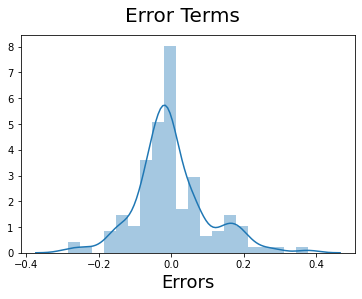

In [61]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [62]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [63]:
df_test.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.209644,0.370121,0.371743,0.228835,0.667691,0.359521,0.486741,0.375212
std,0.210911,0.179970,0.222354,0.188416,0.228484,0.252970,0.183964,0.208977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076536,0.265306,0.219125,0.126638,0.515873,0.140323,0.389764,0.221053
50%,0.136847,0.327988,0.344065,0.183406,0.674603,0.312903,0.475591,0.326316
75%,0.280049,0.482507,0.540726,0.287118,0.857143,0.432258,0.642126,0.421053
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
y_test = df_test.pop('price')
X_test = df_test

In [65]:
X_train_new = X_train_lm.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns] 
X_test_new = sm.add_constant(X_test_new)

In [66]:
y_pred = lm.predict(X_test_new)

In [67]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6910707507601941

Text(0, 0.5, 'y_pred')

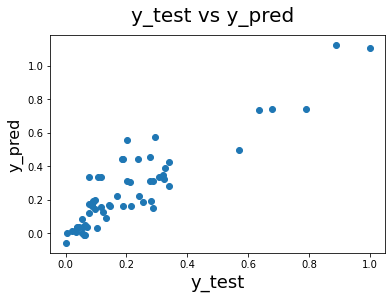

In [68]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     250.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           6.17e-47
Time:                        16:15:01   Log-Likelihood:                 125.63
No. Observations:                 143   AIC:                            -245.3
Df Residuals:                     140   BIC:                            -236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.016     -4.981      0.0

Inference :
R-sqaured and Adjusted R-squared (extent of fit) - 0.781 and 0.778 - 78% variance explained.
F-stats and Prob(F-stats) (overall model fit) - 250.1 and 6.17e-47(approx. 0.0) - Model is significant and explained 78% variance.
p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.